In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [3]:
train = datasets.MNIST("", train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [5]:
for data in trainset:
    break
x, y = data[0][0], data[1][0]
print(y)

tensor(7)


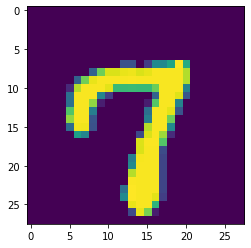

In [6]:
plt.imshow(x.view(x.shape[1], x.shape[2]))
plt.show()

In [7]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x
    
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)        
EPOCHS = 3

In [8]:
for epoch in range(EPOCHS):
    correct = 0
    total = 0
    for data in trainset:
        X, y = data
        model.zero_grad()
        output = model(X.view(-1, 784))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
        output = model(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
    print("accuracy = ",str(correct/total))
    print(loss)

accuracy =  0.9282333333333334
tensor(0.3182, grad_fn=<NllLossBackward>)
accuracy =  0.9705666666666667
tensor(0.3854, grad_fn=<NllLossBackward>)
accuracy =  0.97905
tensor(0.7090, grad_fn=<NllLossBackward>)


In [9]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = model(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.964
